<a href="https://colab.research.google.com/github/MohammadRaziei/Deep-Learning-Course/blob/master/HW04/Q2/HW04_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW04 : Problem 2

Please check last updates and get the latest version from following link. it is more completed but it may have some updates after release it.

[<img src="https://img.icons8.com/clouds/50/000000/github.png"/>](https://github.com/MohammadRaziei/Deep-Learning-Course/blob/master/)  
github link : https://github.com/MohammadRaziei/Deep-Learning-Course/blob/master/HW04

In [1]:
!wget -q https://github.com/MohammadRaziei/DataSetsArchive/raw/master/NWPU%20VHR-10%20dataset.zip -O 'NWPU VHR-10 dataset.zip'
!unzip -oq "NWPU VHR-10 dataset.zip" 
!rm -f "NWPU VHR-10 dataset.zip" 
print('dataset is ready to use :)')

dataset is ready to use :)


In [2]:
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/prepare_data.py
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/visual_dataset.py

## Part O

In [3]:
from pprint import pprint
from visual_dataset import getGroundTruthList
pprint(getGroundTruthList(17))

[{(52,515),(152,594), airplane},
 {(233,393),(312,452), airplane},
 {(258,472),(333,529), airplane},
 {(272,546),(368,622), airplane},
 {(175,109),(258,187), airplane},
 {(463,9),(543,93), airplane},
 {(521,124),(618,197), airplane},
 {(451,229),(535,311), airplane},
 {(773,352),(856,425), airplane},
 {(891,282),(973,370), airplane},
 {(387,382),(443,429), storageTank},
 {(403,437),(459,478), storageTank},
 {(423,489),(475,527), storageTank},
 {(466,355),(530,403), storageTank},
 {(490,417),(555,467), storageTank},
 {(523,324),(588,374), storageTank},
 {(548,384),(614,437), storageTank},
 {(615,291),(673,332), storageTank},
 {(634,343),(693,383), storageTank},
 {(654,389),(711,435), storageTank}]


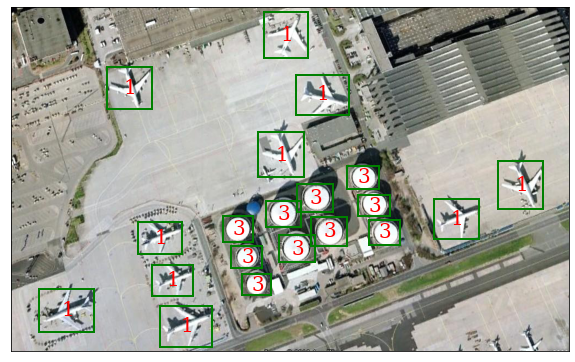

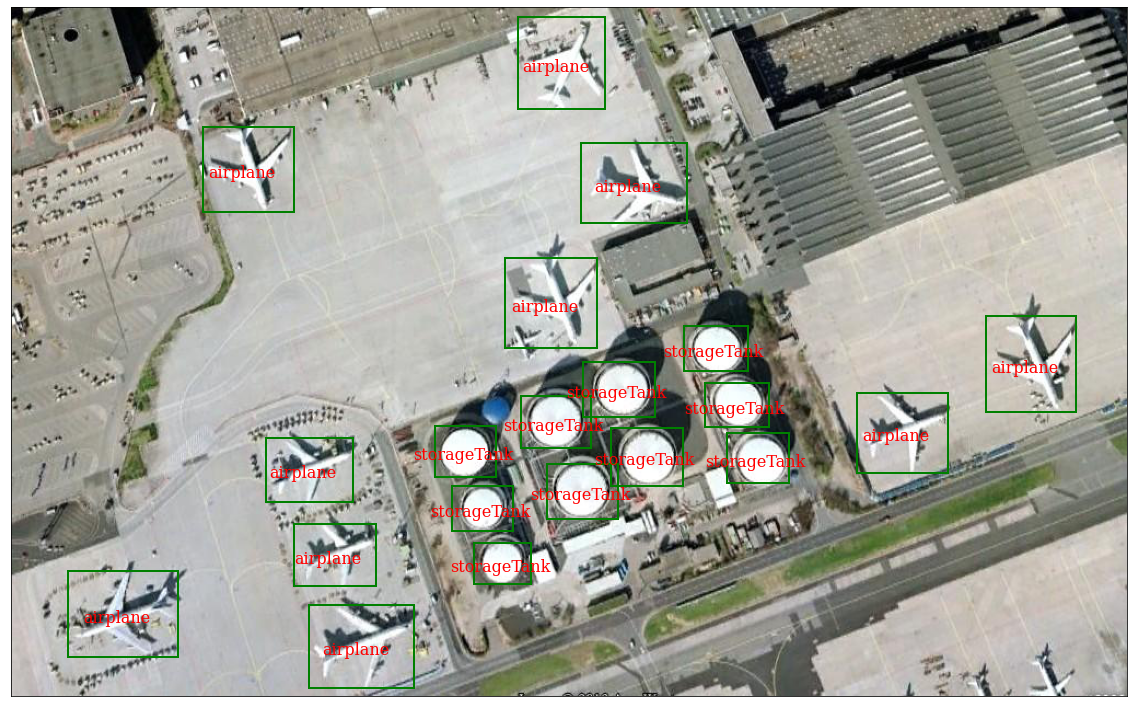

In [72]:
from visual_dataset import visual_dataset
visual_dataset(17, show_name=False, fontsize=20, figsize=(10,10))
visual_dataset(17)

## Part I

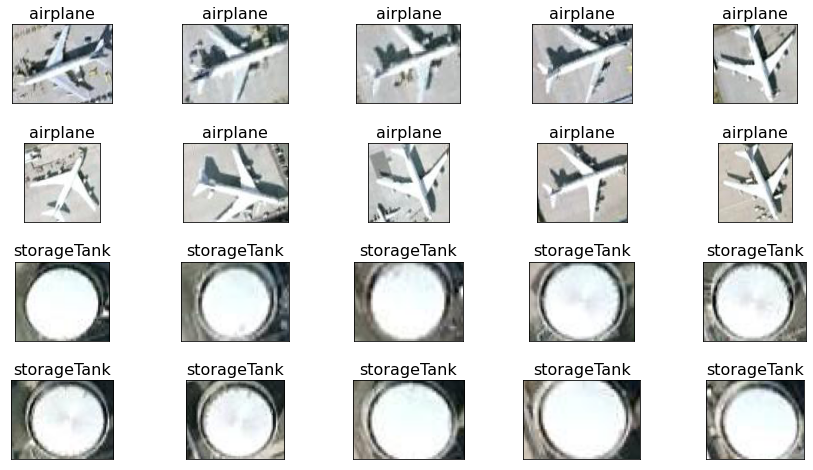

In [5]:
from prepare_data import prepare_data
import matplotlib.pyplot as plt


number = 17
cropped_images, classes = prepare_data(number)

fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0.5)
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(cropped_images[i])
  plt.grid(False); plt.xticks([]); plt.yticks([])
  plt.title(classes[i].name, fontdict={'color':'black', 'fontsize':16})



In [6]:
categories = [cat.value for cat in classes]
categories 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

## Part II

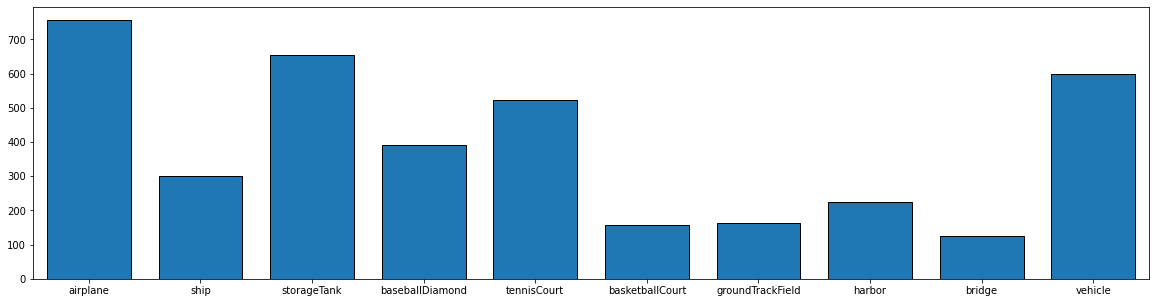

In [73]:
import numpy as np
import os
import matplotlib.pyplot as plt
from prepare_data import getGroundTruthList, ObjectType


number_of_files = len([name for name in os.listdir(os.path.join("NWPU VHR-10 dataset",'ground truth')) if name.endswith('.txt')])

all_classes = np.array([]);
for i in range(1,number_of_files):
  groundTruthList = getGroundTruthList(i)
  classes_i = [obj.object_type.value for obj in groundTruthList]
  all_classes = np.concatenate((all_classes, classes_i), axis=0)

plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.hist(all_classes, bins=np.arange(1,12), rwidth=0.75, edgecolor='black')
ax.set_xticks(1.5+np.arange(10))
ax.set_xlim(1,11)
ax.set_xticklabels([ObjectType(i+1).name for i in range(10)])
plt.show()


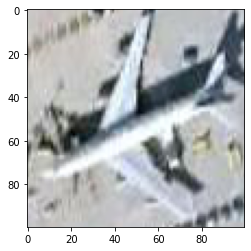

In [67]:
from PIL import Image
import numpy as np


def resize_image(image, target_size = (100,100)):
  img = Image.fromarray(image)
  img = img.resize(target_size, Image.ANTIALIAS)
  img = np.asarray(img)
  return img

img = cropped_images[0]
plt.imshow(resize_image(img))
plt.show()

## Part III